In [61]:
import pandas as pd
import numpy as np
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/MachineLearning_Platzi')

In [62]:
X = pd.read_csv('df_intermediate.csv')
y = X['worldwide_gross']
X = X.drop(['worldwide_gross','opening_gross','usa_gross','gross'], axis=1)
X.corr()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
production_budget,1.000000,0.201366,0.176322,0.301237,0.253897,0.170107,0.032426
title_year,0.201366,1.000000,0.213483,-0.090945,0.110216,0.041898,-0.115936
aspect_ratio,0.176322,0.213483,1.000000,0.151673,0.069685,0.025423,0.026549
duration,0.301237,-0.090945,0.151673,1.000000,0.127823,0.072737,0.355267
cast_total_facebook_likes,0.253897,0.110216,0.069685,0.127823,1.000000,0.030398,0.107507
budget,0.170107,0.041898,0.025423,0.072737,0.030398,1.000000,0.030680
imdb_score,0.032426,-0.115936,0.026549,0.355267,0.107507,0.030680,1.000000


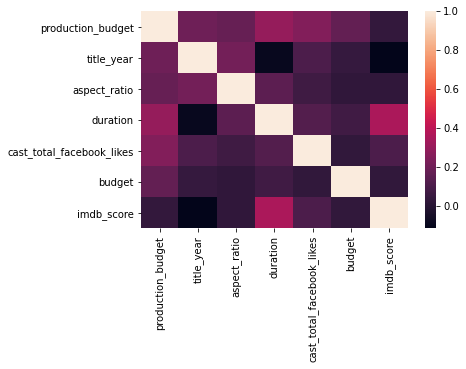

In [63]:
import seaborn as sns
sns.heatmap(X.corr())
### se puede ver que en terminos generales las variables no estan muy correlacionadas

In [64]:
#### Mientras más dimensiones se tiene, se necesitan más datos para poder entrenar un modelo. Esto debido a que cada vez que crece la dimension del espacio 
#### se necesita mas datos para poder cubrir solo una pequeña porcion de la dimension del espacio. Por lo que dificulta al momento de poder generalizar
###  Por eso es que mientras menos dimensiones se tiene va a ser mucho mejor el poder generalizar el modelo, 
###  a no ser que se tenga un control muy fino sobre lo que pasa en dimensiones superiores y esto es un gran problema

In [65]:
from sklearn.linear_model import Lasso
model = Lasso()

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 42)
len(x_train)/len(X)

0.75

In [67]:
model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
model.score(x_test, y_test)

0.5530419834077425

In [69]:
model.coef_

array([ 2.96563201e+00, -4.04954430e+04, -2.05359706e+07, -1.40941910e+05,
        5.72265671e+02,  2.71900630e-03,  3.23086083e+07])

In [70]:
var = np.floor(np.log10((np.abs(model.coef_))))

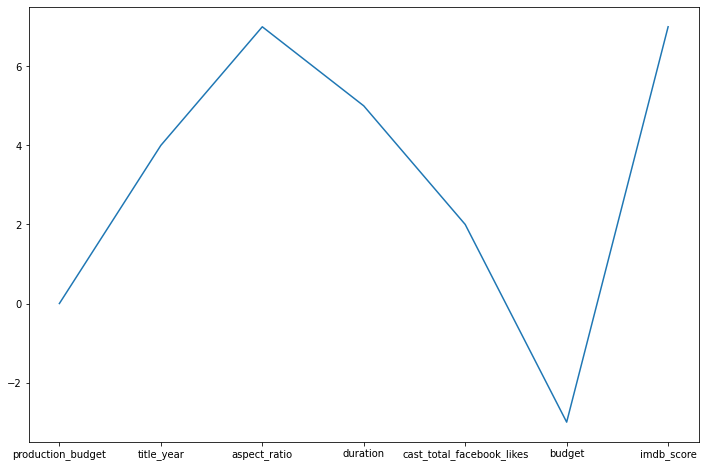

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(var)
plt.xticks(np.arange(7), list(X.columns));

## Correlacion entre variables

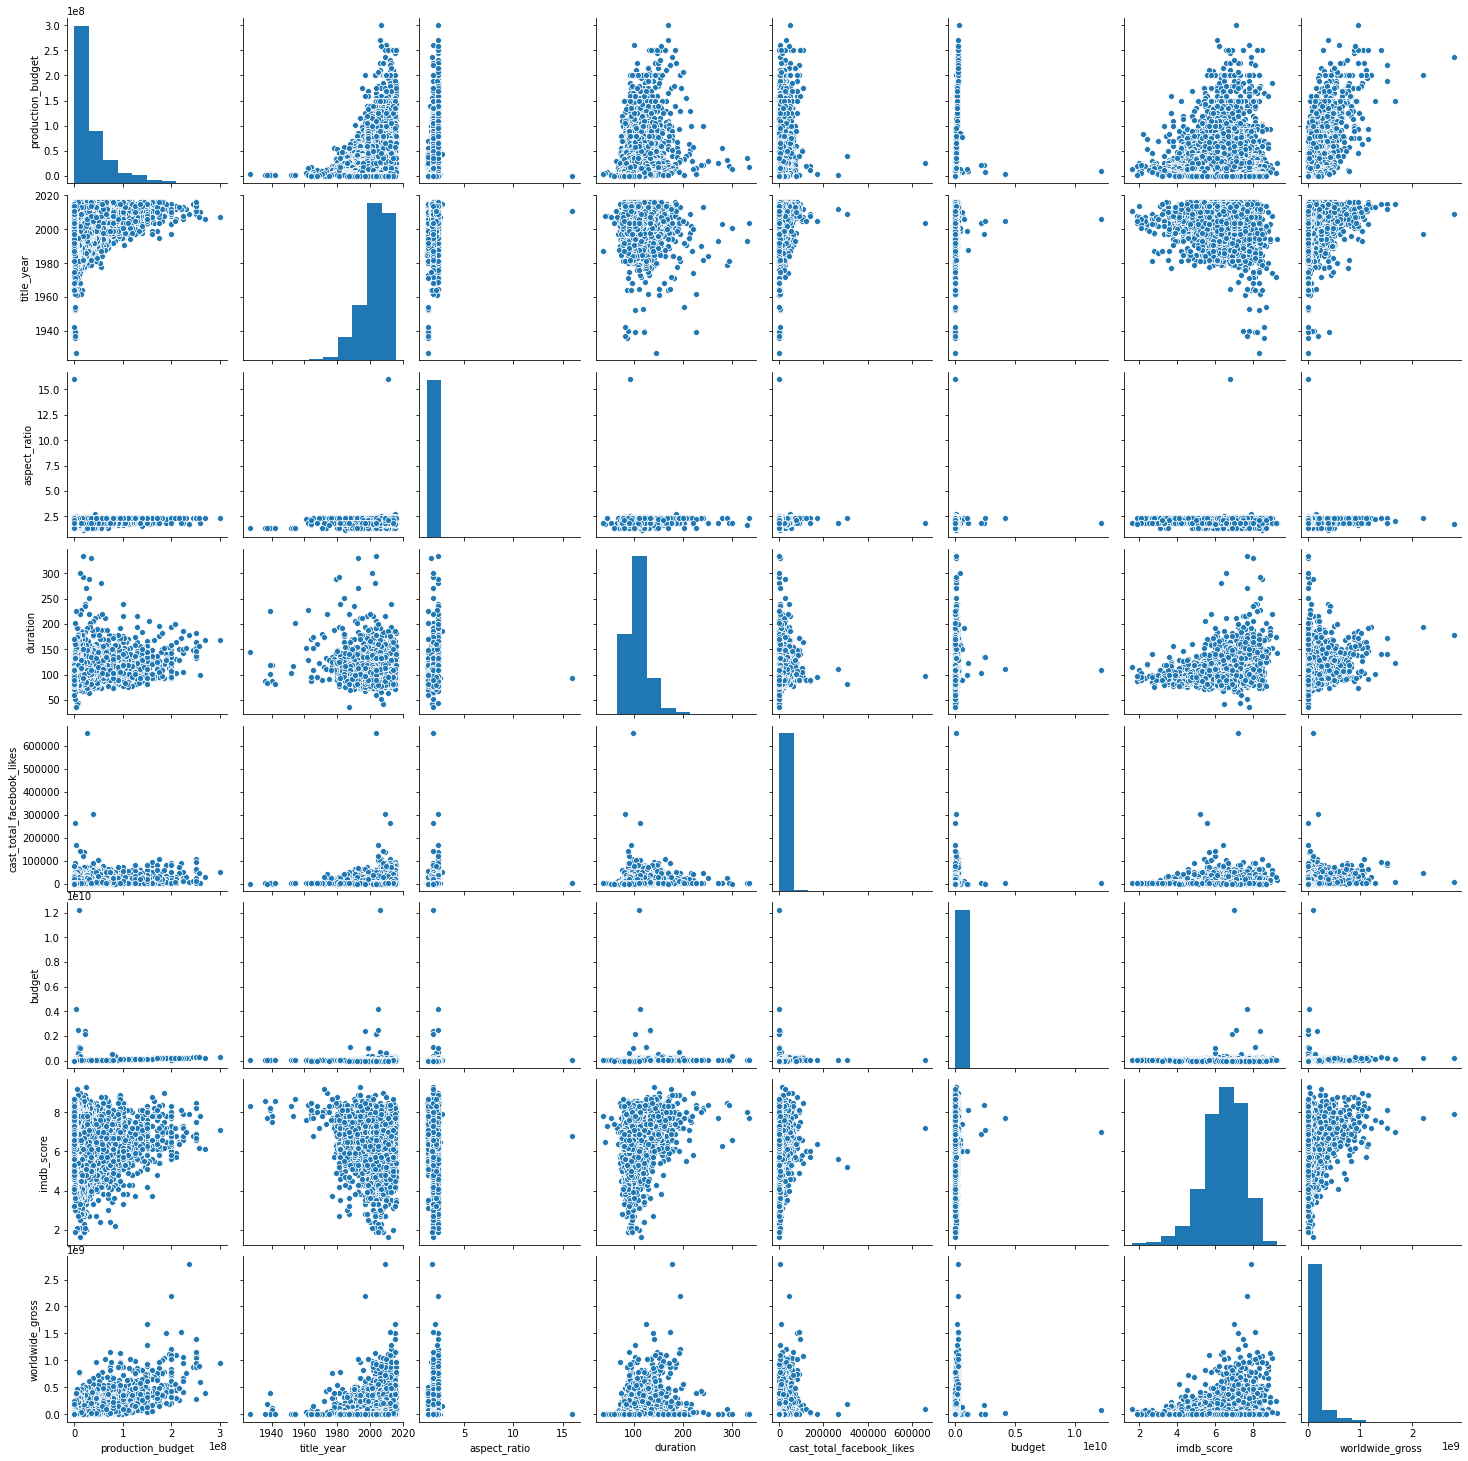

In [72]:
import seaborn as sns
z = pd.concat([X,y], axis=1)
sns.pairplot(z)

In [73]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
z2 = pd.concat([X,clase], axis=1)

In [74]:
# sns.pairplot(z2, hue='class')

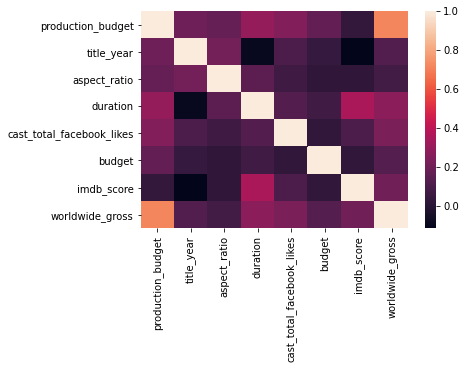

In [75]:
### aqui podemos ver que las variables production_budget y budget no se encuentran correlaciones
### a pesar de tratar de lo mismo, esto nos indica de la importancia de considerar la calidad de los datos
### Tambien se puede observar a priori que la mas correlacionada al target es la variable production_budget
z3 = pd.concat([X,y], axis=1)
sns.heatmap(z3.corr())

## Metodos de seleccion automatica de features


In [76]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7f799a2b37b8>)

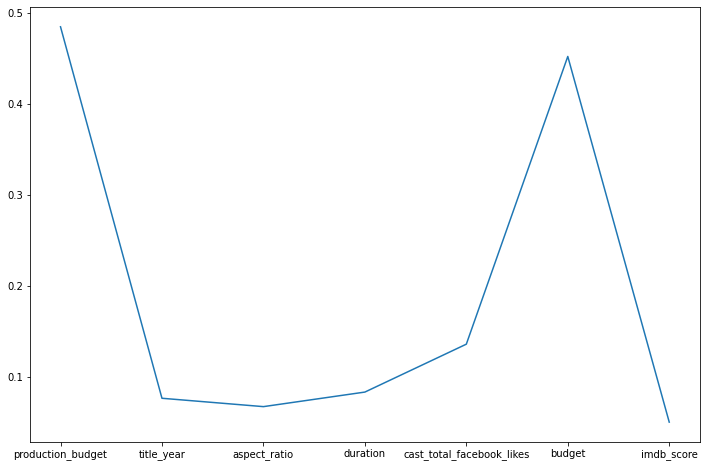

In [77]:
scores = selector.scores_
plt.figure(figsize=(12,8))
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));

In [78]:
X2 = X[['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget', 'cast_total_facebook_likes', 'imdb_score']]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 42)
x2_train, x2_test, y2_train, y2_test = x_train[X2.columns], x_test[X2.columns], y_train, y_test
x3_train, x3_test, y3_train, y3_test = x_train[X3.columns], x_test[X3.columns], y_train, y_test

In [80]:
from sklearn.linear_model import Lasso
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()
model1.fit(x_train, y_train)
model2.fit(x2_train, y2_train)
model3.fit(x3_train, y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
print(model1.score(x_test,y_test))
print(model2.score(x2_test,y2_test))
print(model3.score(x3_test,y3_test))

0.5530419834077425
0.549990379099615
0.5510577853063754


## Creacion y transformacion de features

### Escalado de los datos

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [83]:
scaler.mean_

array([3.67023440e+07, 2.00353593e+03, 2.10965092e+00, 1.09468043e+02,
       1.09533723e+04, 4.63149873e+07, 6.44530938e+00])

In [84]:
scaler.scale_

array([4.17346555e+07, 9.24825099e+00, 3.66749034e-01, 2.20091460e+01,
       1.52836411e+04, 2.51374770e+08, 1.05469972e+00])

In [85]:
x_train_scaled, x_test_scaled = scaler.transform(x_train), scaler.transform(x_test)

In [88]:
from sklearn.linear_model import Lasso
model = Lasso()
model_scaled = Lasso()

model.fit(x_train, y_train)
model_scaled.fit(x_train_scaled, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [89]:
print(model.score(x_test,y_test))
print(model_scaled.score(x_test_scaled,y_test))

0.5530419834077425
0.5530419850875636


In [ ]:
### el escalado puede funcionar bien en problemas de clasificacion, pero en un modelo de regresion no mejora casi nada

In [90]:
from sklearn.pipeline import make_pipeline
model_scaled = make_pipeline(StandardScaler(), Lasso())
model_scaled.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [92]:
print(model_scaled.score(x_test, y_test))

0.5530419850875636


In [ ]:
### pipeline para la automatizacion de funciones a realizar empleando las clases de Sklearn

### Crear nuevas features de forma automatica

In [93]:
A = np.arange(6).reshape(3,2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [94]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2)
transformer.fit(A)
transformer.transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [98]:
X.shape

(4008, 7)

In [97]:
### aplicando polinomial features a los datos reales
transformer = PolynomialFeatures(2)
transformer.fit_transform(X).shape

(4008, 36)

In [99]:
model_poly = make_pipeline(PolynomialFeatures(2), Lasso())
model_poly.fit(x_train, y_train)
model_poly.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.683004099950851e+19, tolerance: 9185736087173392.0
  positive)


0.5905106928587317

### Binary Encoder

In [101]:
movies_obj = pd.read_csv('movies_objs.csv')
movies_obj.shape

(4008, 11)

In [102]:
movies_obj.apply(pd.Series.nunique).sort_values()

color                2
content_rating      18
language            35
country             52
genres             805
actor_1_name      1531
director_name     1757
actor_2_name      2317
actor_3_name      2748
plot_keywords     3870
movie_title       3928
dtype: int64

In [104]:
!pip install -q category_encoders

In [109]:
categoricals = movies_obj[['actor_1_name','director_name']]
categoricals.head()

,actor_1_name,director_name
0,CCH Pounder,James Cameron
1,Johnny Depp,Gore Verbinski
2,Christoph Waltz,Sam Mendes
3,Tom Hardy,Christopher Nolan
4,Doug Walker,Doug Walker


In [122]:
categoricals =categoricals.reset_index(drop=True).fillna(0)

In [123]:
X_binenc = pd.concat([X, categoricals], axis=1)
X_binenc.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,actor_1_name,director_name
0,237000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,CCH Pounder,James Cameron
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,Johnny Depp,Gore Verbinski
2,245000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8,Christoph Waltz,Sam Mendes
3,250000000.0,2012.0,2.35,164.0,106759.0,250000000.0,8.5,Tom Hardy,Christopher Nolan
4,250000000.0,2012.0,2.35,132.0,1873.0,263700000.0,6.6,Doug Walker,Doug Walker


In [124]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['actor_1_name','director_name'])
X_binenc = encoder.fit_transform(X_binenc)
X_binenc.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,actor_1_name_0,actor_1_name_1,actor_1_name_2,actor_1_name_3,actor_1_name_4,actor_1_name_5,actor_1_name_6,actor_1_name_7,actor_1_name_8,actor_1_name_9,actor_1_name_10,actor_1_name_11,director_name_0,director_name_1,director_name_2,director_name_3,director_name_4,director_name_5,director_name_6,director_name_7,director_name_8,director_name_9,director_name_10,director_name_11
0,237000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,245000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1
3,250000000.0,2012.0,2.35,164.0,106759.0,250000000.0,8.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,250000000.0,2012.0,2.35,132.0,1873.0,263700000.0,6.6,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [127]:
xb_train, xb_test, y_train, y_test = train_test_split(X_binenc, y, random_state = 42)
x_train, x_test = xb_train[X.columns], xb_test[X.columns]

In [131]:
model_binenc = Lasso()
model = Lasso()

model_binenc.fit(xb_train, y_train)
model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [132]:
### se puede concluir que no mejora aplicando binary enconding. Por lo que se puede concluir que debe de trabajar con las 7 features
print(model_binenc.score(xb_test, y_test))
print(model.score(x_test, y_test))

0.5526886718670796
0.5530419834077425
